### Ceci est un titre: Occitanie polution

In [1]:
# ceci est un commentaire dans du code
# nous allons travailler en collaboration sur ce fichier
# svp essayer de rédiger directement en pep8
# rediger en anglais à terme également

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact  # widget manipulation

pd.options.display.max_rows = 8

# A terme, notre projet devra fournir:
  + Une vidéo du niveau d'ozone en fonction du temps dans les villes d'occitanie, via certainement une map qui évolue en fonction du temps (contrainte: un cercle plus ou moins gros devra indiquer le niveau d'ozone) *DIFFICULTE +++* 
  + Un "widget" qui compare les niveaux de pollution de 3 villes grâce à des boxplot/violons *DIFFICULTE +*
  + *DIFFICULTE ++* : faire varier le widget en fonction du temps
  + Une comparaison Paris VS Montpellier *DIFFICULTE ?*

## Importation et traitement des données mensuelles:


In [56]:
from download import download
# on a choisi les données journalières (pour l'instant...)

url = "https://opendata.arcgis.com/datasets/2ab16a5fb61f42c1a689fd9cc466383f_0.csv"
path_target = "datasets/Mesure_journaliere_Region_Occitanie_Polluants_Principaux.csv"
download(url, path_target, replace=True)

file_sizes: 10.9MB [00:08, 1.30MB/s]                                            


Successfully downloaded file to datasets/Mesure_journaliere_Region_Occitanie_Polluants_Principaux.csv


'datasets/Mesure_journaliere_Region_Occitanie_Polluants_Principaux.csv'

In [61]:
occ = pd.read_csv(path_target)
# Dans occ sont stockées les données de toute l'occitanie

occ.head(n=5) # le plus simple pour visualiser la tête du tableau

,X,Y,nom_dept,nom_com,insee_com,nom_station,code_station,typologie,influence,nom_poll,id_poll_ue,valeur,unite,metrique,date_debut,date_fin,statut_valid,x_l93,y_l93,ObjectId
0,0.744722,43.0944,HAUTE-GARONNE,MIRAMONT-DE-COMMINGES,31344,Saint Gaudens-Miramont Industriel,FR50015,Urbaine,Industrielle,O3,7,63.5,ug.m-3,journaliere,2020-01-10T01:00:00.000Z,2020-01-11T00:00:00.000Z,t,516263,6224304,3001
1,1.467650,43.6431,HAUTE-GARONNE,TOULOUSE,31555,Toulouse - Rte Albi Trafic,FR50054,Urbaine,Trafic,NO,38,18.0,ug.m-3,journaliere,2020-01-10T01:00:00.000Z,2020-01-11T00:00:00.000Z,t,576334,6283873,3002
2,1.467650,43.6431,HAUTE-GARONNE,TOULOUSE,31555,Toulouse - Rte Albi Trafic,FR50054,Urbaine,Trafic,NO2,8,30.2,ug.m-3,journaliere,2020-01-10T01:00:00.000Z,2020-01-11T00:00:00.000Z,t,576334,6283873,3003
3,2.903450,42.6840,PYRENEES-ORIENTALES,PERPIGNAN,66136,Perpignan Sud - urbain,FR50219,Urbaine,Fond,NO2,8,14.2,ug.m-3,journaliere,2020-01-10T01:00:00.000Z,2020-01-11T00:00:00.000Z,t,692077,6176047,3004
4,1.373000,43.6310,HAUTE-GARONNE,BLAGNAC,31069,Blagnac Aéroport Piste,FR50043,Périurbaine,Trafic,NO,38,3.0,ug.m-3,journaliere,2020-01-10T01:00:00.000Z,2020-01-11T00:00:00.000Z,t,568669,6282681,3005


Description des variables: 

   + X et Y : coordonnées ?
   + nom_dept : nom du département
   + nom_com : nom de la commune
   + insee_com: ?
   + nom_station : station qui récolte les données
   + code_station : code de la station
   + typologie : type de zone
   + influence : ce qui peut influencer la pollution 
   + nom_poll : nom du polluant
   + id_poll_ue : identifiant du polluant 
   + valeur : valeur mesurée du polluant
   + unite : unité
   + date_debut: année/mois/jour/heure
   + date_fin: idem
   + status_valid : ? 
   + x_l93 : ?
   + y_l93 : ?
   + objectld : ?

In [62]:
# Description des variables?
occ.describe()

,X,Y,insee_com,id_poll_ue,valeur,x_l93,y_l93,ObjectId
count,55551.000000,55551.000000,55551.000000,55551.000000,55551.000000,55551.000000,5.555100e+04,55551.000000
mean,2.216568,43.559854,40382.694623,530.746503,25.273560,636388.544131,6.274746e+06,27776.000000
std,1.407885,0.437303,17266.894480,1683.323136,30.582217,113968.896627,4.823615e+04,16036.336739
min,-0.051944,42.684000,9225.000000,1.000000,-25.200000,451389.000000,6.176047e+06,1.000000
25%,1.376000,43.230300,31483.000000,7.000000,6.300000,568918.000000,6.241231e+06,13888.500000
50%,1.845730,43.610000,32317.000000,8.000000,13.800000,608927.000000,6.279364e+06,27776.000000
75%,3.504830,43.675800,48095.000000,38.000000,32.900000,740996.000000,6.286912e+06,41663.500000
max,4.697360,44.925400,81065.000000,6001.000000,815.600000,836000.000000,6.425805e+06,55551.000000


In [64]:
occ['date'] = pd.to_datetime(occ['date_debut']).dt.to_period('M')
occ['date']
#permet de rajouter la date dans une nouvelle colonne : année + mois proprement 

occ.head(n=3)

,X,Y,nom_dept,nom_com,insee_com,nom_station,code_station,typologie,influence,nom_poll,...,valeur,unite,metrique,date_debut,date_fin,statut_valid,x_l93,y_l93,ObjectId,date
0,0.744722,43.0944,HAUTE-GARONNE,MIRAMONT-DE-COMMINGES,31344,Saint Gaudens-Miramont Industriel,FR50015,Urbaine,Industrielle,O3,...,63.5,ug.m-3,journaliere,2020-01-10T01:00:00.000Z,2020-01-11T00:00:00.000Z,t,516263,6224304,3001,2020-01
1,1.467650,43.6431,HAUTE-GARONNE,TOULOUSE,31555,Toulouse - Rte Albi Trafic,FR50054,Urbaine,Trafic,NO,...,18.0,ug.m-3,journaliere,2020-01-10T01:00:00.000Z,2020-01-11T00:00:00.000Z,t,576334,6283873,3002,2020-01
2,1.467650,43.6431,HAUTE-GARONNE,TOULOUSE,31555,Toulouse - Rte Albi Trafic,FR50054,Urbaine,Trafic,NO2,...,30.2,ug.m-3,journaliere,2020-01-10T01:00:00.000Z,2020-01-11T00:00:00.000Z,t,576334,6283873,3003,2020-01


In [6]:
occ.nom_com.unique() # villes disponibles dans le data set

array(['TOULOUSE', 'ALBI', 'MONTPELLIER', 'CASTRES', 'LOURDES', 'TARBES',
       'SAINT-GAUDENS', 'NIMES', 'MENDE', 'SAINT-LAURENT-DES-ARBRES',
       'LA CALMETTE', 'LATTES', 'PERPIGNAN', 'SAINT-GELY-DU-FESC', 'SAZE',
       'MIRAMONT-DE-COMMINGES', 'CARCASSONNE', 'RODEZ', 'LUNEL-VIEL',
       'BIARS-SUR-CERE', 'AGDE', 'BLAGNAC', 'CORNEILHAN',
       'PEYRUSSE-VIEILLE', 'BELESTA-EN-LAURAGAIS', 'MONTGISCARD',
       'BESSIERES', 'SAINT-ESTEVE', 'CAUNES-MINERVOIS', 'ROQUEREDONDE',
       'VALLABREGUES', 'PAMIERS'], dtype=object)

In [65]:
# choix des villes pour le wiget : Toulouse, Montpellier, Carcassonne
ville = 'MONTPELLIER', 'TOULOUSE', 'LOURDES'

In [66]:
occ.nom_dept.unique() # départements disponibles dans le data set
# tous ces départements constituent l'occitanie
# trouver une map adaptée !! 

array(['HAUTE-GARONNE', 'PYRENEES-ORIENTALES', 'GARD', 'AVEYRON', 'GERS',
       'HAUTES-PYRENEES', 'TARN', 'HERAULT', 'AUDE', 'LOZERE', 'LOT',
       'ARIEGE'], dtype=object)

In [68]:
# On selectionne les données des 3 villes et du polluant qui nous interessent:

df_villes = occ[occ['nom_com'].isin(ville)] # les villes qui nous interessent
df_villes = df_villes[df_villes['nom_poll'] == 'O3'] # le polluant qui nous interesse

df_villes.tail(n=10)

,X,Y,nom_dept,nom_com,insee_com,nom_station,code_station,typologie,influence,nom_poll,...,valeur,unite,metrique,date_debut,date_fin,statut_valid,x_l93,y_l93,ObjectId,date
55351,1.438610,43.6236,HAUTE-GARONNE,TOULOUSE,31555,Toulouse-Mazades Urbain,FR50021,Urbaine,Fond,O3,...,42.3,ug.m-3,journaliere,2020-02-14T01:00:00.000Z,2020-02-15T00:00:00.000Z,t,573948,6281752,52801,2020-02
55357,1.385410,43.5970,HAUTE-GARONNE,TOULOUSE,31555,Station Pedagogique,FR50058,Urbaine,Fond,O3,...,42.3,ug.m-3,journaliere,2020-02-14T01:00:00.000Z,2020-02-15T00:00:00.000Z,t,569593,6278883,52807,2020-02
55363,1.418610,43.5756,HAUTE-GARONNE,TOULOUSE,31555,Toulouse-Jacquier Urbain,FR50004,Urbaine,Fond,O3,...,40.1,ug.m-3,journaliere,2020-02-14T01:00:00.000Z,2020-02-15T00:00:00.000Z,t,572227,6276450,52813,2020-02
55368,-0.038889,43.0969,HAUTES-PYRENEES,LOURDES,65286,Lourdes-Lapaca Urbain,FR50042,Urbaine,Fond,O3,...,41.0,ug.m-3,journaliere,2020-02-14T01:00:00.000Z,2020-02-15T00:00:00.000Z,t,452460,6226722,52818,2020-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55519,1.443890,43.5872,HAUTE-GARONNE,TOULOUSE,31555,Toulouse-Berthelot Urbain,FR50030,Urbaine,Fond,O3,...,38.8,ug.m-3,journaliere,2020-02-15T01:00:00.000Z,2020-02-16T00:00:00.000Z,t,574294,6277699,52969,2020-02
55520,1.438610,43.6236,HAUTE-GARONNE,TOULOUSE,31555,Toulouse-Mazades Urbain,FR50021,Urbaine,Fond,O3,...,41.8,ug.m-3,journaliere,2020-02-15T01:00:00.000Z,2020-02-16T00:00:00.000Z,t,573948,6281752,52970,2020-02
55523,1.385410,43.5970,HAUTE-GARONNE,TOULOUSE,31555,Station Pedagogique,FR50058,Urbaine,Fond,O3,...,41.8,ug.m-3,journaliere,2020-02-15T01:00:00.000Z,2020-02-16T00:00:00.000Z,t,569593,6278883,52973,2020-02
55550,3.886890,43.5915,HERAULT,MONTPELLIER,34172,Montpellier - Prés d Arènes Urbain,FR50200,Urbaine,Fond,O3,...,42.9,ug.m-3,journaliere,2020-02-15T01:00:00.000Z,2020-02-16T00:00:00.000Z,t,771642,6277340,53000,2020-02


In [10]:
df_villes.date.unique()
# On a les données journalières de mars 2019 à mars 2020 (WOW!)

<PeriodArray>
['2020-01', '2020-02', '2019-12', '2019-09', '2019-08', '2019-04', '2019-05',
 '2019-11', '2019-10', '2019-07', '2019-03', '2020-03', '2019-06']
Length: 13, dtype: period[M]

In [70]:
# On doit vérifier que chaque ville ait le même nombre de données:

# *********************** MISSION *******************************
# Choisir dans un premier temps un mois sur lequel se fixer pour le widget 
# Dans un second temps faire évoluer le widget en fonction des jours/mois

mtp = df_villes[df_villes['nom_com'] == 'MONTPELLIER'] # data frame de Montpellier et O3
mtp.head(n=5)

,X,Y,nom_dept,nom_com,insee_com,nom_station,code_station,typologie,influence,nom_poll,...,valeur,unite,metrique,date_debut,date_fin,statut_valid,x_l93,y_l93,ObjectId,date
126,3.88689,43.5915,HERAULT,MONTPELLIER,34172,Montpellier - Prés d Arènes Urbain,FR50200,Urbaine,Fond,O3,...,46.0,ug.m-3,journaliere,2020-01-11T01:00:00.000Z,2020-01-12T00:00:00.000Z,t,771642,6277340,3127,2020-01
297,3.88689,43.5915,HERAULT,MONTPELLIER,34172,Montpellier - Prés d Arènes Urbain,FR50200,Urbaine,Fond,O3,...,74.6,ug.m-3,journaliere,2020-02-25T01:00:00.000Z,2020-02-26T00:00:00.000Z,t,771642,6277340,3298,2020-02
398,3.88689,43.5915,HERAULT,MONTPELLIER,34172,Montpellier - Prés d Arènes Urbain,FR50200,Urbaine,Fond,O3,...,26.0,ug.m-3,journaliere,2020-01-12T01:00:00.000Z,2020-01-13T00:00:00.000Z,t,771642,6277340,3399,2020-01
444,3.88689,43.5915,HERAULT,MONTPELLIER,34172,Montpellier - Prés d Arènes Urbain,FR50200,Urbaine,Fond,O3,...,56.8,ug.m-3,journaliere,2020-02-28T01:00:00.000Z,2020-02-29T00:00:00.000Z,t,771642,6277340,3445,2020-02
712,3.88689,43.5915,HERAULT,MONTPELLIER,34172,Montpellier - Prés d Arènes Urbain,FR50200,Urbaine,Fond,O3,...,20.5,ug.m-3,journaliere,2020-01-13T01:00:00.000Z,2020-01-14T00:00:00.000Z,t,771642,6277340,3713,2020-01


In [73]:
mtp = mtp[mtp.date == '2020-01'] # On se fixe un mois, par exemple janvier 2020
mtp.head(n=5)

,X,Y,nom_dept,nom_com,insee_com,nom_station,code_station,typologie,influence,nom_poll,...,valeur,unite,metrique,date_debut,date_fin,statut_valid,x_l93,y_l93,ObjectId,date
126,3.88689,43.5915,HERAULT,MONTPELLIER,34172,Montpellier - Prés d Arènes Urbain,FR50200,Urbaine,Fond,O3,...,46.0,ug.m-3,journaliere,2020-01-11T01:00:00.000Z,2020-01-12T00:00:00.000Z,t,771642,6277340,3127,2020-01
398,3.88689,43.5915,HERAULT,MONTPELLIER,34172,Montpellier - Prés d Arènes Urbain,FR50200,Urbaine,Fond,O3,...,26.0,ug.m-3,journaliere,2020-01-12T01:00:00.000Z,2020-01-13T00:00:00.000Z,t,771642,6277340,3399,2020-01
712,3.88689,43.5915,HERAULT,MONTPELLIER,34172,Montpellier - Prés d Arènes Urbain,FR50200,Urbaine,Fond,O3,...,20.5,ug.m-3,journaliere,2020-01-13T01:00:00.000Z,2020-01-14T00:00:00.000Z,t,771642,6277340,3713,2020-01
835,3.88689,43.5915,HERAULT,MONTPELLIER,34172,Montpellier - Prés d Arènes Urbain,FR50200,Urbaine,Fond,O3,...,49.2,ug.m-3,journaliere,2020-01-14T01:00:00.000Z,2020-01-15T00:00:00.000Z,t,771642,6277340,3836,2020-01
1272,3.88689,43.5915,HERAULT,MONTPELLIER,34172,Montpellier - Prés d Arènes Urbain,FR50200,Urbaine,Fond,O3,...,45.1,ug.m-3,journaliere,2020-01-26T01:00:00.000Z,2020-01-27T00:00:00.000Z,t,771642,6277340,6273,2020-01


In [74]:
mtp.code_station.unique()

array(['FR50200'], dtype=object)

In [75]:
print('Il y a', mtp.count()[0], 'données pour Montpellier au mois de janvier 2020') 

Il y a 31 données pour Montpellier au mois de janvier 2020


In [15]:
tls = df_villes[df_villes['nom_com'] == 'TOULOUSE']

In [16]:
tls = tls[tls.date == '2020-01']

In [17]:
tls.code_station.unique() # On remarque qu'il y a 4 stations !! 
# pas bon pour avoir le même nombre de données que Mtp par exemple

array(['FR50030', 'FR50021', 'FR50004', 'FR50058'], dtype=object)

In [18]:
tls.count()[0] # effectivement il y en 118, beaucoup trop donc il faut choisir une station en particulier

118

In [19]:
# On choisit par exemple la station qui s'appelle Toulouse Berthelot urbain et dont le code est FR50030
tls = tls[tls.code_station == 'FR50030']

In [20]:
tls.count()[0] # maintenant si on recompte il y en a bien 31

31

In [21]:
lds = df_villes[df_villes['nom_com'] == 'LOURDES']

In [22]:
lds = lds[lds.date == '2020-01']

In [23]:
lds.code_station.unique()

array(['FR50042'], dtype=object)

In [24]:
lds.count()[0] # assez de données, enfin car avant j'ai essayé carcassonne et perpignan qui avaient pas assez de data

31

In [25]:
df_villes = df_villes[df_villes.date=='2020-01']

In [27]:
df_villes = df_villes[['nom_com', 'valeur']] # il n'y a plus que les villes et les valeurs de O3 dans le dataframe

In [55]:
df_villes.head(n=10)

,nom_com,valeur
54,TOULOUSE,25.2
56,TOULOUSE,27.3
58,TOULOUSE,28.4
61,LOURDES,10.3
...,...,...
314,MONTPELLIER,25.4
317,TOULOUSE,14.0
343,TOULOUSE,13.5
346,LOURDES,18.0


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

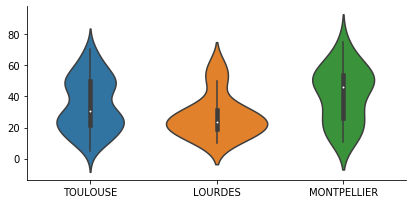

In [54]:
sns.catplot(x=df_villes['nom_com'], y=df_villes['valeur'], 
            data=df_villes,
            height=3,aspect=2,
            kind='violin')

# ceci n'est qu'un boxplot avec plein d'erreurs, il faut un widget, que doit on faire varier?
# il faudrait garder les mois pour faire un widget en fonction des mois
# il faut s'assurer que pour tous les mois, il y ait le bon nombre de données...

On va maintenant implémenter le widget qui compare la polution dans 3 villes en fonction du temps:

In [28]:
def hist_explore(n_bins=24, alpha=0.25, density=False):
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    ax.hist(df_villes['valeur'], density=density,
            bins=n_bins, alpha=0.25)  # standardization
    plt.xlabel('valeur')
    plt.ylabel('Density level')
    plt.title("blabla")
    plt.tight_layout()
    plt.show()

In [29]:
interact(hist_explore, n_bins=(1, 50, 1), alpha=(0, 1, 0.1), density=False)

interactive(children=(IntSlider(value=24, description='n_bins', max=50, min=1), FloatSlider(value=0.25, descri…

<function __main__.hist_explore(n_bins=24, alpha=0.25, density=False)>

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

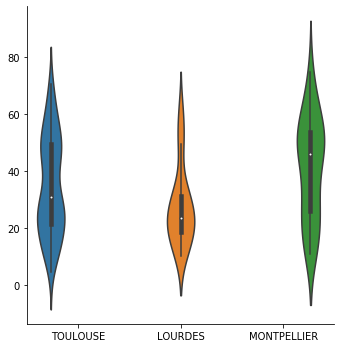